
              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

96
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.25024811 1.00235464 1.41431374 1.39645219 0.96497969 0.82446688
 1.40001433 0.61019854 0.99303433 1.25563757 1.27540004 1.45831605
 1.00422184 0.96294518 0.98795595 0.77718327 1.2744222  0.87866132
 0.74777952 1.22538044 1.99074818 0.79908503 1.34569143 0.82328683
 1.08475806 1.28203126 1.14539757 1.14199491 1.16123124 1.14866178
 0.91305592 0.86502065 0.53408709 1.37424265 1.85817588 0.66289249
 1.01024382 0.65502472]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.5754

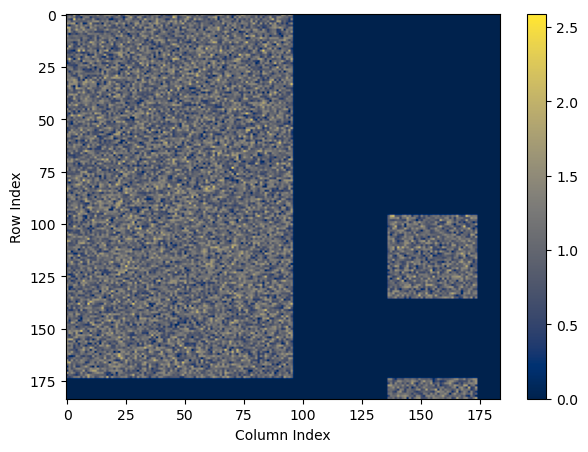


Feb 28 16:11:47 NodeManager::prepare_nodes [Info]: 
    Preparing 191 nodes for simulation.

Feb 28 16:11:47 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 191
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Feb 28 16:11:48 SimulationManager::run [Info]: 
    Simulation finished.
 source   target   synapse model   weight   delay 
-------- -------- --------------- -------- -------
      1        1  static_synapse    16.52   1.000
 source   target   synapse model   weight   delay 
-------- -------- --------------- -------- -------
      1        2  static_synapse    18.78   1.000
 source   target   synapse model   weight   delay 
-------- -------- --------------- -------- -------
      1        3  static_synapse    11.17   1.000
 source   target   synapse model   weight   delay 
-------- -------- --------------- -------- -------
      1        4  static_synapse    36.26   1.000
 source   target   synapse model   weight   delay 


NESTError: No events recorded!

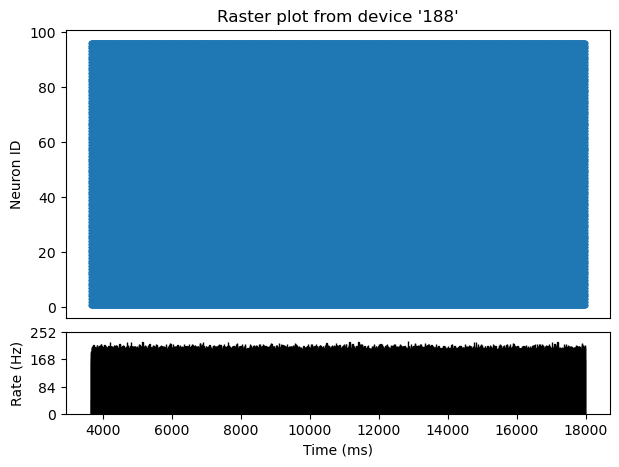

In [1]:
import pandas as pd
import numpy as np
from scripts import neuron_categorization, optimization, model, visualizations

eztrack_data = pd.read_csv('/hpc/mzhu843/modelling/nest/DATA/raw/ezytrack/behaviour_LocationOutput.csv')
spike_data = np.load('/hpc/mzhu843/modelling/nest/DATA/processed/spikes/S_3_p.npy')

categorizer = neuron_categorization.NeuronCategorizer(spike_data, eztrack_data)
categorizer.run_categorization()
categorised_neurons = categorizer.get_categorized_neurons()



weights = optimization.initialize_connectivity_matrix_normal_distribution(categorised_neurons)
visualizations.plot_matrix(weights)


network = model.NeuronalNetwork(weights, categorizer.get_categorized_neurons(), G_e=3.9, G_i=-4)
network.simulate()
network.show_raster()





